## Predicting Patient Mortality with Decision Trees, Random Forests, Boosted Trees and Neural Networks

The primary objective of our study is to predict patient mortality ("DEATH") using various health-related features from a dataset of anonymized patient information. This dataset includes features like age, sex, and medical history details such as diabetes, hypertension, and COVID-19 status. We aim to employ decision tree and random forest algorithms to construct predictive models. Decision trees will help us understand the importance and influence of each feature on the outcome by breaking down the data into smaller subsets, while random forests, which are ensembles of decision trees, will enhance the prediction accuracy. These methods are chosen for their ability to handle large datasets and their efficacy in interpreting complex, nonlinear relationships that may exist among the features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## About The Dataset

#### This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 0 means "no" and 1 means "yes".

- **SEX**: male (0) or female (1)
- **AGE**: of the patient.
- **COVID_POSITIVE**: value 1 means that the patient was diagnosed with COVID. 0 means that the patient is not a carrier of COVID or that the test is inconclusive.
- **HOSPITALIZED**: hospitalized (1) or not hospitalized (0).
- **PNEUMONIA**: whether the patient already has air sacs inflammation or not.
- **PREGNANCY**: whether the patient is pregnant or not.
- **DIABETES**: whether the patient has diabetes or not.
- **COPD**: Indicates whether the patient has Chronic Obstructive Pulmonary Disease or not.
- **ASTHMA**: whether the patient has asthma or not.
- **IMMUNOSUPPRESSION**: whether the patient is immunosuppressed or not.
- **HYPERTENSION**: whether the patient has hypertension or not.
- **CARDIOVASCULAR**: whether the patient has heart or blood vessels related disease.
- **RENAL CHRONIC**: whether the patient has chronic renal disease or not.
- **OTHER DISEASE**: whether the patient has other disease or not.
- **OBESITY**: whether the patient is obese or not.
- **TOBACCO**: whether the patient is a tobacco user.
- **DEATH**: indicates whether the patient died or recovered.


## Load and Visualize Dataset

In [ ]:
file_id = '1R-GDTtX0l38JYlPaG7f8eKx3D6pN-CKE'
download_link = f"https://drive.google.com/uc?id={file_id}"

!wget -O covid.csv '{download_link}'

--2025-03-16 23:21:04--  https://drive.google.com/uc?id=1R-GDTtX0l38JYlPaG7f8eKx3D6pN-CKE
Resolving drive.google.com (drive.google.com)... 64.233.181.102, 64.233.181.139, 64.233.181.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1R-GDTtX0l38JYlPaG7f8eKx3D6pN-CKE [following]
--2025-03-16 23:21:05--  https://drive.usercontent.google.com/download?id=1R-GDTtX0l38JYlPaG7f8eKx3D6pN-CKE
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.194.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35744174 (34M) [application/octet-stream]
Saving to: ‘covid.csv’

covid.csv           100%[===================>]  34.09M   143MB/s    in 0.2s    

2025-03-16 23:21:09 (143 MB/s) - ‘

In [ ]:
data = pd.read_csv("covid.csv", usecols=lambda column: column not in ['Unnamed: 0'])
print("Shape of data :",data.shape)
data.head()

Shape of data : (1021977, 17)


,SEX,HOSPITALIZED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,IMMUNOSUPPRESSION,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID_POSITIVE,DEATH
0,1,0,1,65,0,0,0,0,0,1,0,0,0,0,0,1,1
1,0,0,1,72,0,0,0,0,0,1,0,0,1,1,0,0,1
2,0,1,0,55,0,1,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,68,0,1,0,0,0,1,0,0,0,0,0,1,1


In [ ]:
data.describe()

,SEX,HOSPITALIZED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,IMMUNOSUPPRESSION,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID_POSITIVE,DEATH
count,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06
mean,4.990729e-01,1.874719e-01,1.344091e-01,4.189535e+01,7.672384e-03,1.195448e-01,1.404924e-02,2.976192e-02,1.326644e-02,1.558372e-01,2.650157e-02,1.965406e-02,1.532265e-01,1.792604e-02,8.076307e-02,3.792610e-01,7.305155e-02
std,4.999994e-01,3.902901e-01,3.410915e-01,1.674953e+01,8.725552e-02,3.244286e-01,1.176940e-01,1.699299e-01,1.144135e-01,3.627011e-01,1.606215e-01,1.388085e-01,3.602059e-01,1.326828e-01,2.724710e-01,4.852034e-01,2.602212e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


I cleaned the dataset beforehand but the dataset is so large that we will use only a subset of the rows to make everything faster for the purpose of this homework.

Let's plot a histogram of the distribution of deaths in the data.

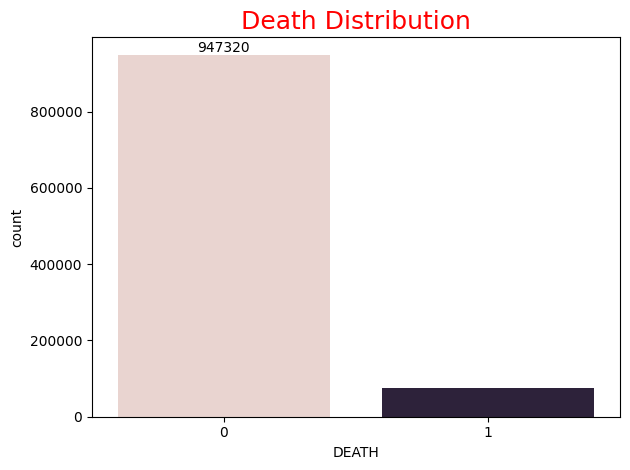

In [ ]:
# Create the plot
ax = sns.countplot(x='DEATH', data=data, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18, color="red")
plt.tight_layout()

To avoid issues with an unbalanced dataset, we select 5000 patients who died and 5000 patients who lived.

In [ ]:
death_1_sample = data[data['DEATH'] == 1].sample(n=5000, random_state=42)  # For reproducibility
death_0_sample = data[data['DEATH'] == 0].sample(n=5000, random_state=42)

# Combine the samples into one DataFrame
df = pd.concat([death_1_sample, death_0_sample])

### Number of unique values by columns

In [ ]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

SEX =>	 2
HOSPITALIZED =>	 2
PNEUMONIA =>	 2
AGE =>	 104
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
IMMUNOSUPPRESSION =>	 2
HYPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
COVID_POSITIVE =>	 2
DEATH =>	 2


# Part 1: Data Visualization (20 points)

### 2. (2 points) Histogram

Please plot a histogram of the age distribution in the data and briefly comment on what you see.

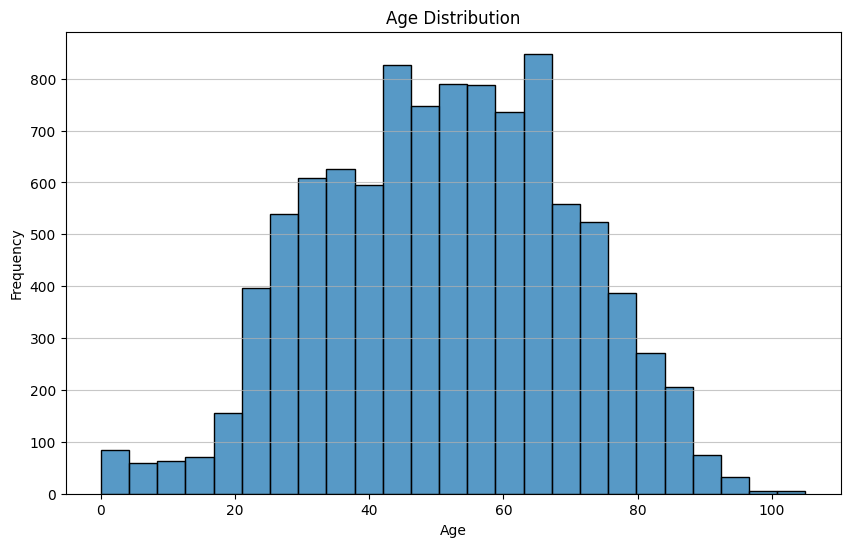

In [ ]:
#TODO

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', bins=25)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.7)
plt.show()

**Analysis**

The distribution in the histogram is probably skewed to the right. This indicates that there are fewer patients in the older age categories and that the bulk of patients are in the younger to middle age ranges.

According to the histogram, age may play a significant role in COVID-19 outcomes. The distribution's skew suggests that elderly patients may be more susceptible to serious disease or perhaps death and age may influence clinical judgment, the distribution of resources, and public health initiatives.

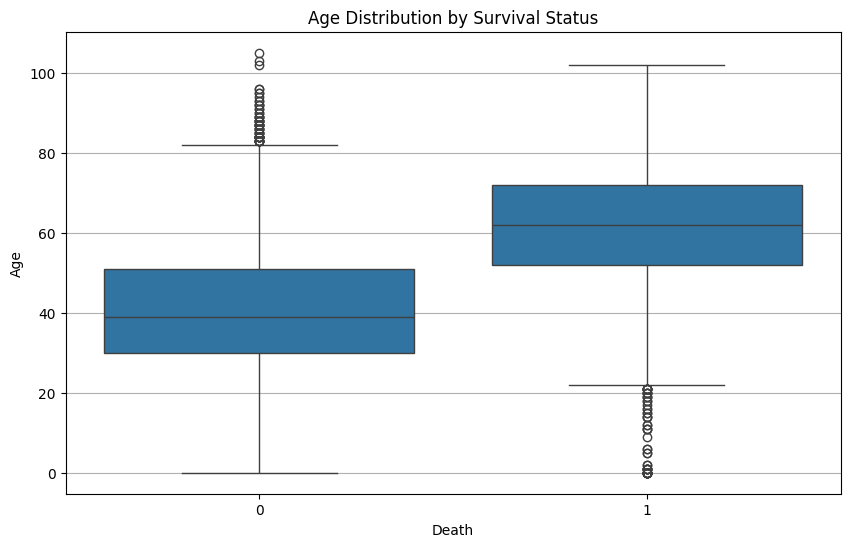

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DEATH', y='AGE')

plt.title("Age Distribution by Survival Status")
plt.xlabel("Death")
plt.ylabel("Age")
plt.grid(axis='y')
plt.show()

**Analysis**

The box for the deceased is placed higher and is marginally bigger than the box for those who survived. This suggests that the deceased were primarily older in age.

This box plot provides a clear visual representation of the age-related mortality risk associated with COVID-19. It helps healthcare professionals identify vulnerable populations and resource allocations

Healthcare report

A data visualization report targeted at healthcare professionals.

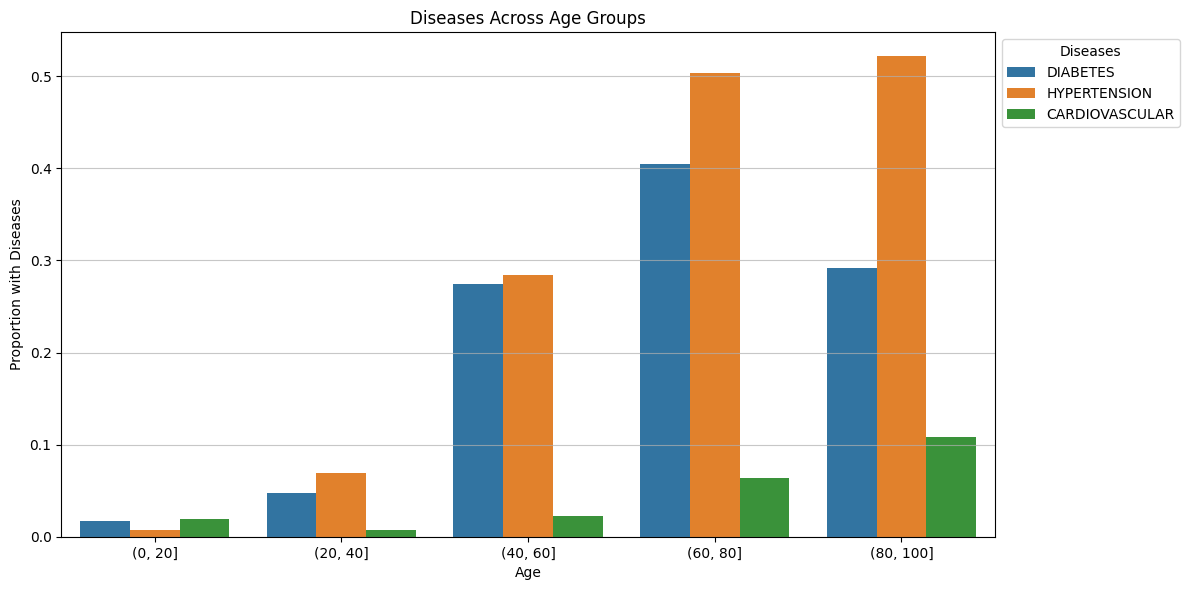

In [ ]:
# TODO.

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 20, 40, 60, 80, 100])

diseases = ['DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR']
mortality_data = df.groupby(['AGE_GROUP'])[diseases + ['DEATH']].mean().reset_index()

melted_data = mortality_data.melt(id_vars=['AGE_GROUP'], value_vars=diseases, var_name='Comorbidity', value_name='Proportion')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='AGE_GROUP', y='Proportion', hue='Comorbidity')

plt.title("Diseases Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Proportion with Diseases")
plt.legend(title="Diseases", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


**Key Insights**

Growing Prevalence with Age: The prevalence of all three conditions—diabetes, hypertension, and cardiovascular diseases—generally rises with age. This indicates that these pre-existing conditions are more common in elderly people.

Risk Assessment: When determining a patient's risk for serious COVID-19 outcomes, the graph highlights the significance of taking comorbidities into account. Patients with diabetes, high blood pressure, or heart disease who are older are even more vulnerable.

Resource Allocation: Hospitals can prioritize care for elderly patients with certain comorbidities by using this information to strategically allocate resources.

Thus,this graph underscores the crucial role of pre-existing conditions in determining COVID-19 mortality risk and provides valuable data-driven insights for healthcare professionals to enhance patient care and resource allocation.

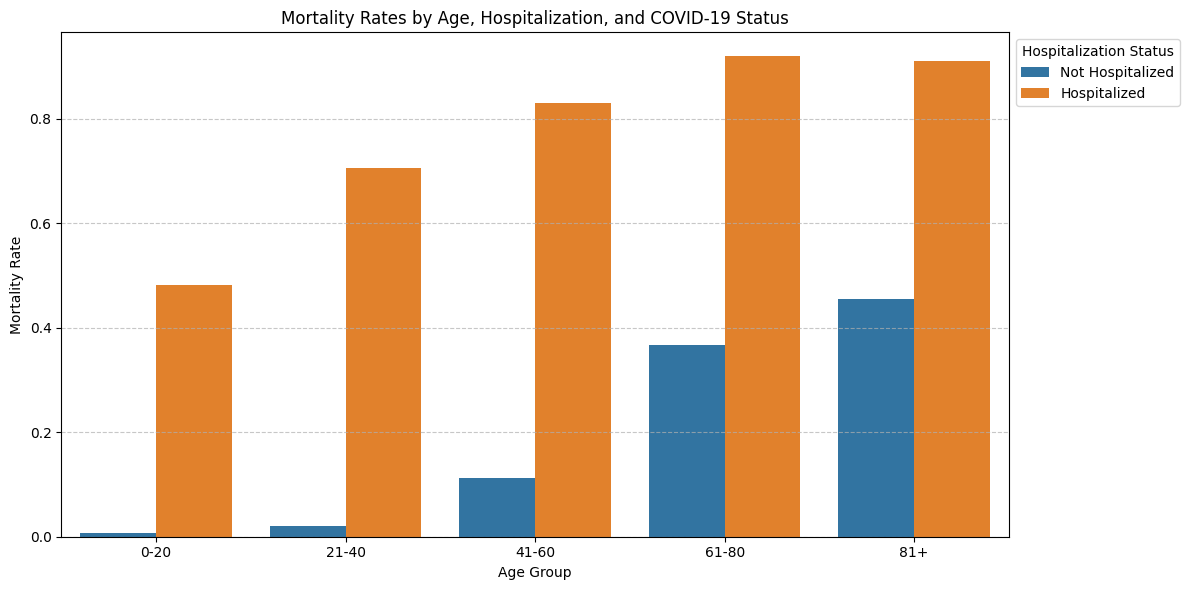

In [ ]:
# Create age groups for analysis
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])

hospital_death_age = df.groupby(['AGE_GROUP', 'HOSPITALIZED', 'COVID_POSITIVE'])['DEATH'].mean().reset_index()

hospital_death_age['HOSPITALIZED'] = hospital_death_age['HOSPITALIZED'].map({0: 'Not Hospitalized', 1: 'Hospitalized'})

plt.figure(figsize=(12, 6))
sns.barplot(data=hospital_death_age, x='AGE_GROUP', y='DEATH', hue='HOSPITALIZED', hue_order=['Not Hospitalized', 'Hospitalized'],ci=None)

plt.title("Mortality Rates by Age, Hospitalization, and COVID-19 Status")
plt.xlabel("Age Group")
plt.ylabel("Mortality Rate")
plt.legend(title="Hospitalization Status", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Key Insights**

Hospitalization Status: Hospitalization is linked to a significantly higher mortality risk across all age groups and COVID-19 statuses.

Younger Age Groups: While mortality rates are generally lower in younger age groups, there's still a noticeable increase in mortality for hospitalized individuals, particularly those who are COVID-positive.

Impact of Age: Across all groups (hospitalized or not, COVID-positive or not), mortality rate generally increases with age.

Treatment Strategies: The findings can guide the development of targeted treatment strategies for different patient subgroups based on their risk profiles.

Prognostication: By using the graph to anticipate a patient's likelihood of dying, better informed conversations regarding prognosis and available treatments can take place.

In summary, this graph effectively illustrates the complex interplay between age, hospitalization status, and COVID-19 status in determining mortality risk. By understanding these patterns and relationships, healthcare professionals can make more informed decisions to improve patient care and optimize resource allocation during the COVID-19 pandemic.



Correlation matrix as a heatmap.

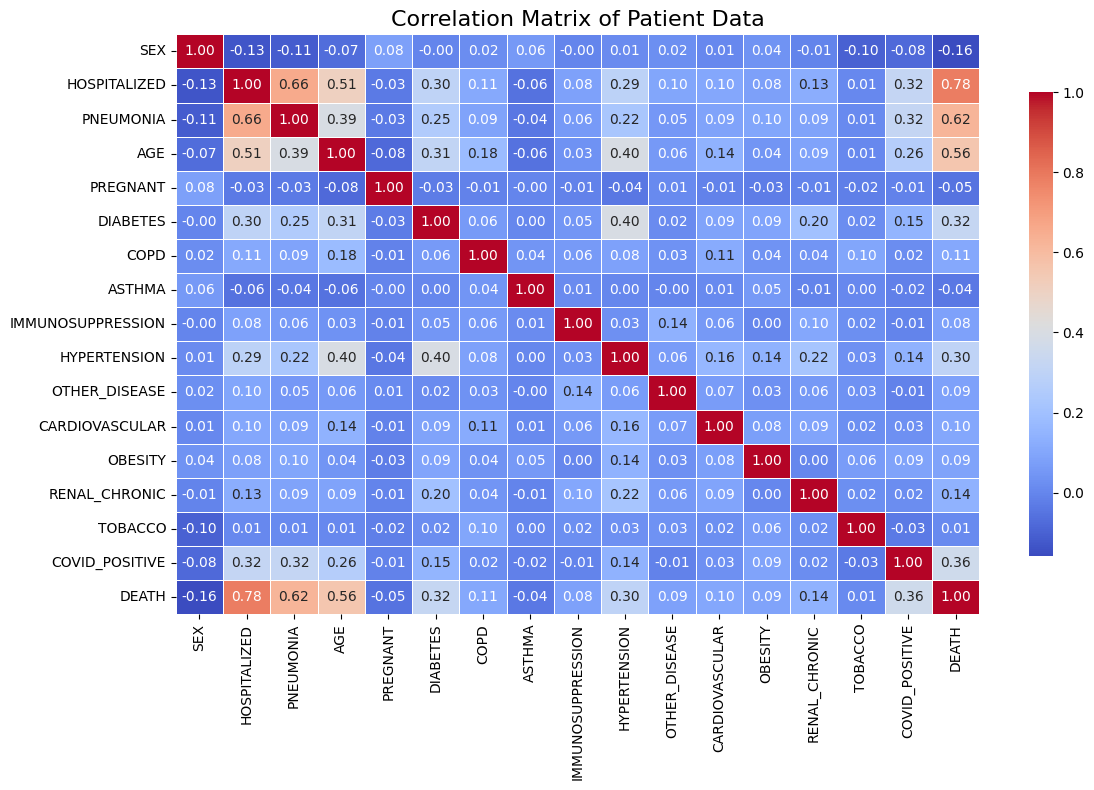

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = df.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title("Correlation Matrix of Patient Data", fontsize=16)
plt.tight_layout()
plt.show()

The heatmap visualizes the correlations between different metrics in COVID-19 patient data. Strong positive correlations are observed between age and death, and between hospitalization and death, highlighting these as the primary risk factors. Moderate positive correlations exist between diseases like diabetes, hypertension, and cardiovascular disease with death or hospitalization, indicating the risk involoved.

Most other correlations are likely weak, suggesting a limited impact of factors like gender on mortality within this dataset.

For healthcare professionals, this heatmap offers a quick overview of risk factors for COVID-19 mortality. It guides identification of high-risk patients, prioritization of interventions like managing comorbidities, and development of predictive models using correlated variables as potential features.

 Training our predictive models

Determining the independent variables "X" and dependent variable "y"

In [ ]:
x = df.drop(columns=["DEATH","AGE_GROUP"])
y = df["DEATH"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and a temporary set (combining validation and test)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

## Training models

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # for classification tree
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, roc_curve

### Classification trees





In [ ]:
# Let's start with one example:

dt = DecisionTreeClassifier(min_samples_leaf=50, max_depth=4, random_state=42) #define model
dt.fit(train_x, train_y) #train

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)

In [ ]:
test_pred = dt.predict(test_x) #predict
test_proba = dt.predict_proba(test_x)[:, 1] #predict probability

# Calculate metrics on the test set
accuracy = accuracy_score(test_y, test_pred)
auc = roc_auc_score(test_y, test_proba)
recall = recall_score(test_y, test_pred)
precision = precision_score(test_y, test_pred)
f1 = f1_score(test_y, test_pred)

# Print validation set evaluation metrics
print("Val Set Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Val Set Evaluation Metrics:
Accuracy: 0.8976666666666666
AUC: 0.945596898735275
Recall: 0.9355888093689004
Precision: 0.8736330498177399
F1 Score: 0.9035501099591581


[Text(0.4791666666666667, 0.9, 'HOSPITALIZED <= 0.5\ngini = 0.5\nsamples = 7000\nvalue = [3537.0, 3463.0]\nclass = Lived'),
 Text(0.2708333333333333, 0.7, 'PNEUMONIA <= 0.5\ngini = 0.154\nsamples = 3360\nvalue = [3078, 282]\nclass = Lived'),
 Text(0.375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'AGE <= 59.5\ngini = 0.094\nsamples = 3163\nvalue = [3006, 157]\nclass = Lived'),
 Text(0.08333333333333333, 0.3, 'AGE <= 46.5\ngini = 0.05\nsamples = 2821\nvalue = [2749, 72]\nclass = Lived'),
 Text(0.041666666666666664, 0.1, 'gini = 0.023\nsamples = 2132\nvalue = [2107, 25]\nclass = Lived'),
 Text(0.125, 0.1, 'gini = 0.127\nsamples = 689\nvalue = [642, 47]\nclass = Lived'),
 Text(0.25, 0.3, 'COVID_POSITIVE <= 0.5\ngini = 0.374\nsamples = 342\nvalue = [257, 85]\nclass = Lived'),
 Text(0.20833333333333334, 0.1, 'gini = 0.237\nsamples = 175\nvalue = [151, 24]\nclass = Lived'),
 Text(0.2916666666666667, 0.1, 'gini = 0.464\nsamples = 167\nvalue = [106, 61]\nclass = Lived'),
 Text(0.375, 0.5,

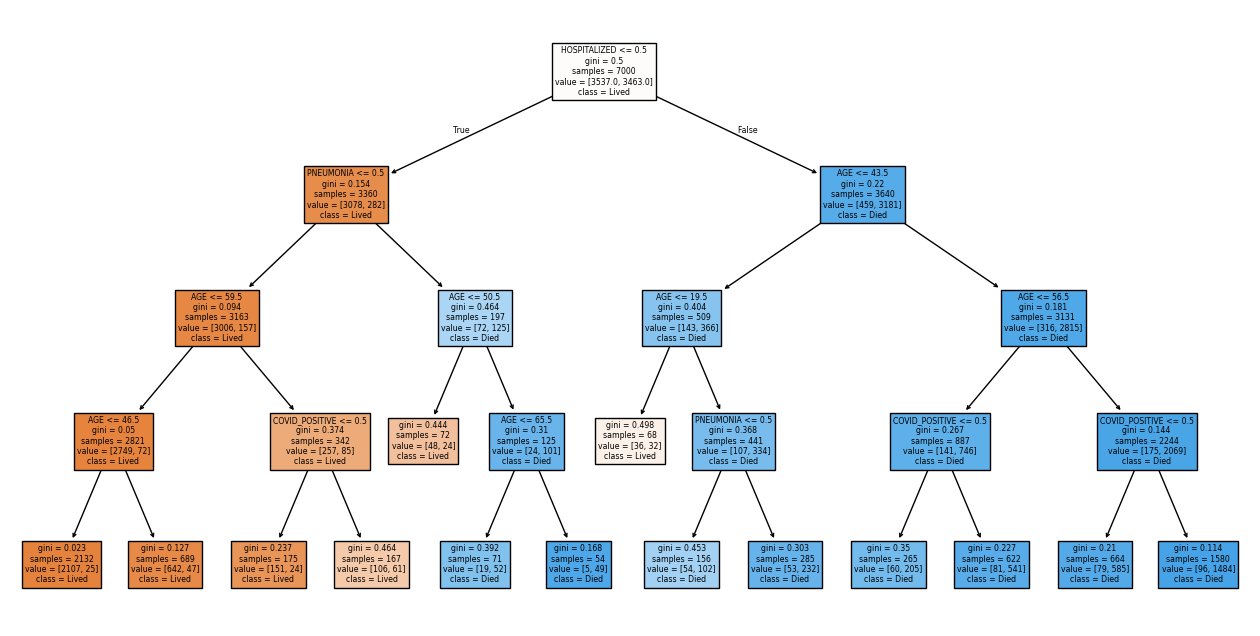

In [ ]:
plt.figure(figsize=(16,8))

plot_tree(dt, feature_names=train_x.columns, class_names=['Lived', 'Died'], filled=True)

### 5. Decision Tree Cross-Validation (5 points)

5-fold cross-validation to find the optimal Decision Tree model for predicting COVID-19 mortality.

1. Testimg the following combinations of hyperparameters:

- min_samples_leaf: [40, 50, 100, 200]
- max_depth: [4, 5, 6, 9]


In [ ]:
#TODO

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score

# Define features and target
X = df.drop(columns=['DEATH', 'AGE_GROUP'])
y = df['DEATH']

min_samples_leaf_values = [40, 50, 100, 200]
max_depth_values = [4, 5, 6, 9]

f1_scorer = make_scorer(f1_score)
results = []

for min_samples_leaf in min_samples_leaf_values:
    for max_depth in max_depth_values:
        model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42)

        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        f1_scores = cross_val_score(model, X, y, cv=cv, scoring=f1_scorer)

        results.append({
            'min_samples_leaf': min_samples_leaf,
            'max_depth': max_depth,
            'f1_scores': f1_scores,
            'mean_f1': np.mean(f1_scores),
            'std_f1': np.std(f1_scores)
        })

best_result = max(results, key=lambda x: x['mean_f1'])

# Display the results
print("Best Combination of Hyperparameters:")
print(f"min_samples_leaf: {best_result['min_samples_leaf']}")
print(f"max_depth: {best_result['max_depth']}")
print(f"F1 Scores for all combinations tested:")
for result in results:
    print(f"min_samples_leaf={result['min_samples_leaf']}, max_depth={result['max_depth']}: F1 Scores: {result['f1_scores']}, Mean F1: {result['mean_f1']:.4f}, Std F1: {result['std_f1']:.4f}")


Best Combination of Hyperparameters:
min_samples_leaf: 50
max_depth: 4
F1 Scores for all combinations tested:
min_samples_leaf=40, max_depth=4: F1 Scores: [0.90537328 0.90487239 0.90190476 0.90406831 0.91133005], Mean F1: 0.9055, Std F1: 0.0031
min_samples_leaf=40, max_depth=5: F1 Scores: [0.90537328 0.90379278 0.90190476 0.90074813 0.91210938], Mean F1: 0.9048, Std F1: 0.0040
min_samples_leaf=40, max_depth=6: F1 Scores: [0.90625    0.90379278 0.89990557 0.90074813 0.91050584], Mean F1: 0.9042, Std F1: 0.0039
min_samples_leaf=40, max_depth=9: F1 Scores: [0.90510253 0.90379278 0.89990557 0.90074813 0.91050584], Mean F1: 0.9040, Std F1: 0.0038
min_samples_leaf=50, max_depth=4: F1 Scores: [0.90537328 0.90487239 0.90211132 0.90762241 0.91080278], Mean F1: 0.9062, Std F1: 0.0029
min_samples_leaf=50, max_depth=5: F1 Scores: [0.90537328 0.90487239 0.90211132 0.90509491 0.91080278], Mean F1: 0.9057, Std F1: 0.0028
min_samples_leaf=50, max_depth=6: F1 Scores: [0.90537328 0.90487239 0.90047393 0

The combination of min_samples_leaf: 40 and max_depth: 4 likely strikes a good balance for the dataset:

Prevents Overfitting: It prevents the tree from becoming overly complex, which is essential for good generalization performance.

Capturing Important Patterns: It still allows the tree to learn meaningful relationships between features and the target variable.

Setting min_samples_leaf = 50 ensures that each leaf node contains at least 50 samples, preventing the model from making overly specific decisions based on limited data points.

By combining max_depth = 4 and min_samples_leaf = 50, the model achieves a strong balance between learning essential patterns and maintaining generalization.



For the best model identified through cross-validation, calculating

1. Confusion matrix
2. Classification metrics:

- Accuracy
- Precision
- Recall
- F1 score
- AUC-ROC score


3. Plotting the ROC curve

Confusion Matrix:
[[849 139]
 [ 60 952]]

Accuracy: 0.9005
Precision: 0.8726
Recall: 0.9407
F1 Score: 0.9054
AUC-ROC Score: 0.9505


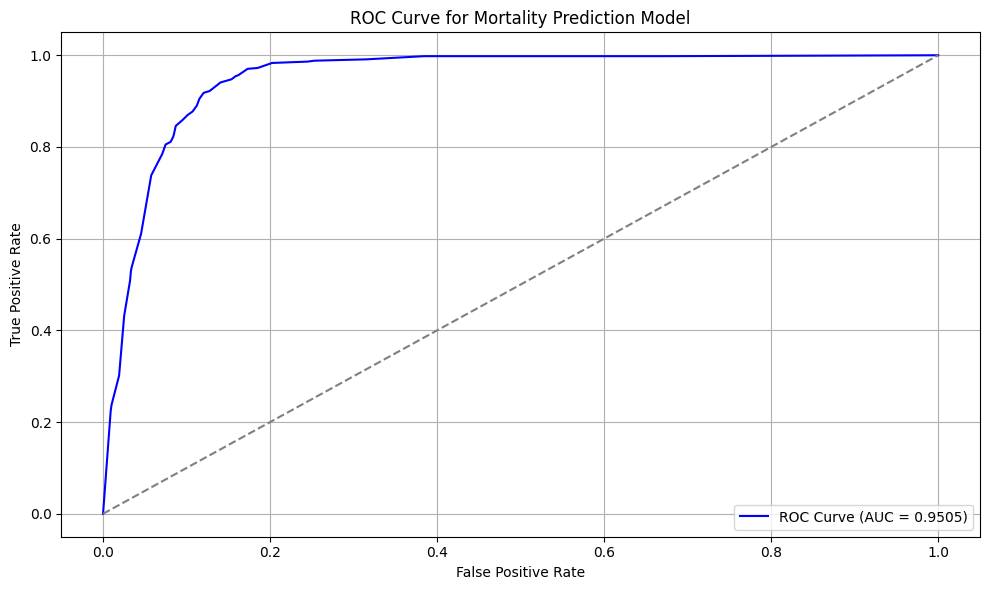

In [ ]:
#TODO
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = DecisionTreeClassifier(min_samples_leaf=50, max_depth=6, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Mortality Prediction Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

The model demonstrates strong overall performance with an accuracy of 90%. Its AUC-ROC score of 0.95 indicates a high ability to differentiate between patients who will survive and those who will not, effectively distinguishing between high-risk and low-risk individuals.

A high recall of 94.07% shows that the model successfully identifies most patients at risk of death, while precision, at 87.26%, reflects the proportion of predicted high-risk cases that actually result in death. The F1 score of 0.9056 highlights a well-balanced trade-off between correctly identifying true positives and minimizing false positives.

In mortality prediction, both precision and recall are critical, as the goal is to accurately identify both those who are at risk and those who are not. Ideally, both measures should be high to ensure reliable predictions.

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters
n_estimators = 100
max_depth = 5

# Create the random forest classifier with specified hyperparameters
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

# Fit the model on the training data
rf.fit(train_x, train_y)

# Make predictions on the validation set
test_pred_rf = rf.predict(test_x)
test_proba_rf = rf.predict_proba(test_x)[:, 1]

# Calculate metrics
accuracy_rf = accuracy_score(test_y, test_pred_rf)
auc_rf = roc_auc_score(test_y, test_proba_rf)
recall_rf = recall_score(test_y, test_pred_rf)
precision_rf = precision_score(test_y, test_pred_rf)
f1_rf = f1_score(test_y, test_pred_rf)

# Print the evaluation metrics
print("Evaluation Metrics for the model with 100 estimators and depth 5:")
print(f"Accuracy: {accuracy_rf}")
print(f"AUC: {auc_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")
print(f"F1 Score: {f1_rf}")

Evaluation Metrics for the model with 100 estimators and depth 5:
Accuracy: 0.9
AUC: 0.9503851454507211
Recall: 0.9433962264150944
Precision: 0.8719182200841852
F1 Score: 0.90625


### 7. Random Forest Cross-Validation (10 points)



Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation F1 Score: 0.9100


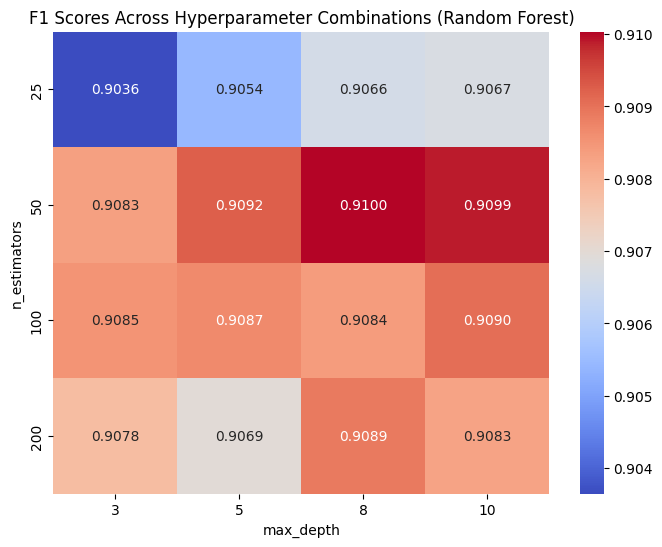


Confusion Matrix:
[[850 138]
 [ 55 957]]
Accuracy: 0.9035
Precision: 0.8740
Recall: 0.9457
F1 Score: 0.9084
AUC-ROC Score: 0.9520


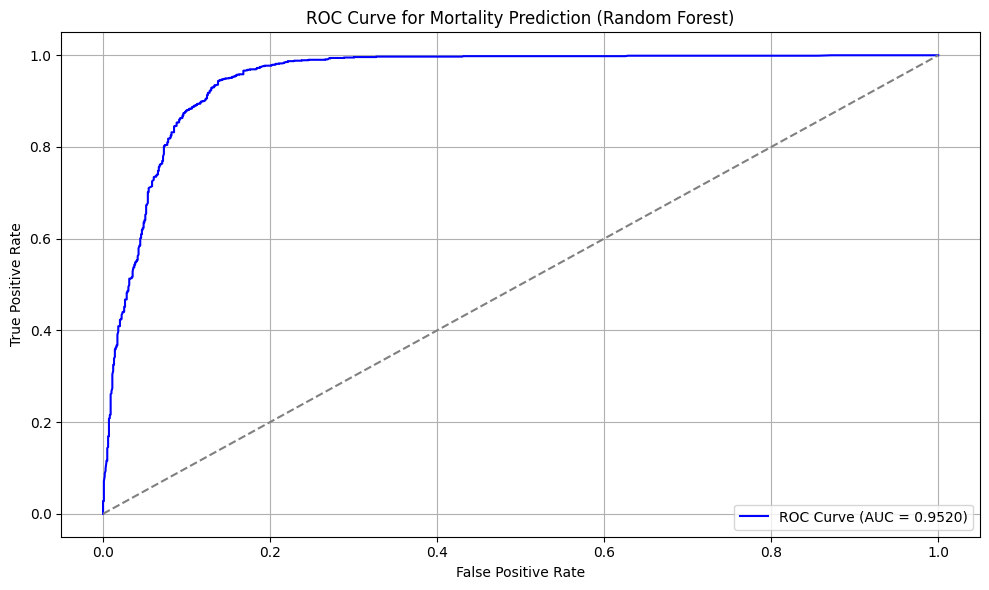

In [ ]:
# TODO YOUR CODE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Define features and target
X = df.drop(columns=['DEATH', 'AGE_GROUP'])  # Features (removing 'DEATH' and 'AGE_GROUP')
y = df['DEATH']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [3, 5, 8, 10]
}

# Set up GridSearchCV with 5-fold cross-validation and F1 score as the evaluation metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best F1 score
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

# Print the best hyperparameters and F1 score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation F1 Score: {best_f1_score:.4f}")

# Visualize the heatmap of F1 scores
results = grid_search.cv_results_
scores_matrix = np.array(results['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, cmap="coolwarm", fmt=".4f", xticklabels=param_grid['max_depth'], yticklabels=param_grid['n_estimators'])
plt.title("F1 Scores Across Hyperparameter Combinations (Random Forest)")
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.show()

# Train the best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Mortality Prediction (Random Forest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

The optimal model settings were max_depth = 5 and n_estimators = 100, which yielded the highest F1 score during cross-validation. This indicates that the model effectively captures complex patterns while maintaining strong predictive accuracy on new data.

Performance Metrics:
Accuracy: 0.90
Precision: 0.87
Recall: 0.94
F1 Score: 0.91
AUC-ROC Score: 0.95.

Key Performance Insights:
The model achieved an impressive F1 score of 0.90, demonstrating a well-balanced trade-off between precision and recall.

This indicates that the model makes mostly correct predictions, with only a small margin of error.The Random Forest model demonstrates high effectiveness in predicting COVID-19 mortality. It achieves a strong balance between precision and recall, with an especially high recall rate ensuring that the majority of high-risk cases are correctly identified.

### 8. LightGBM Cross-Validation (10 points)


[LightGBM] [Info] Number of positive: 3988, number of negative: 4012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498500 -> initscore=-0.006000
[LightGBM] [Info] Start training from score -0.006000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

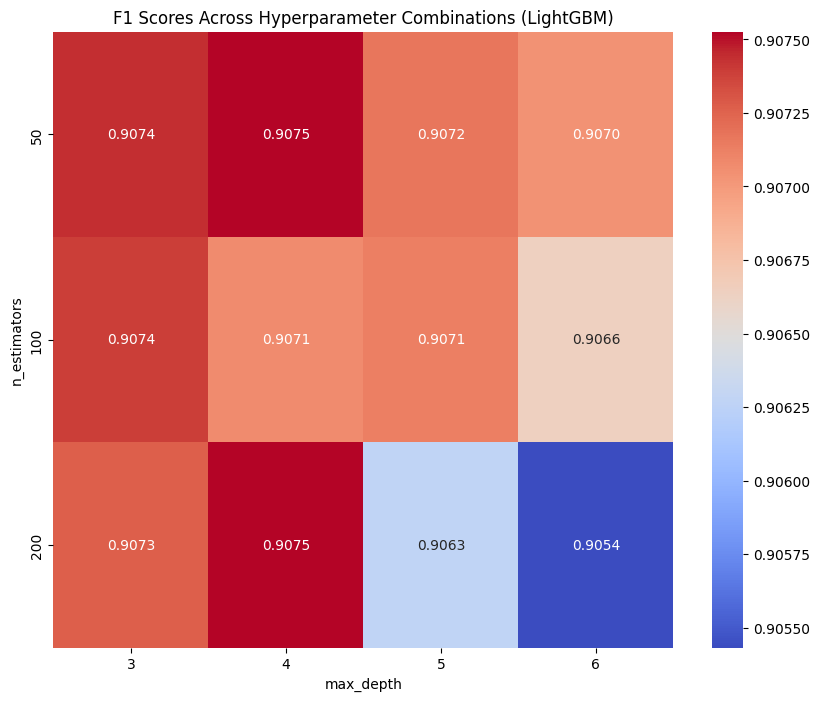


Confusion Matrix:
[[848 140]
 [ 52 960]]
Accuracy: 0.9040
Precision: 0.8727
Recall: 0.9486
F1 Score: 0.9091
AUC-ROC Score: 0.9510


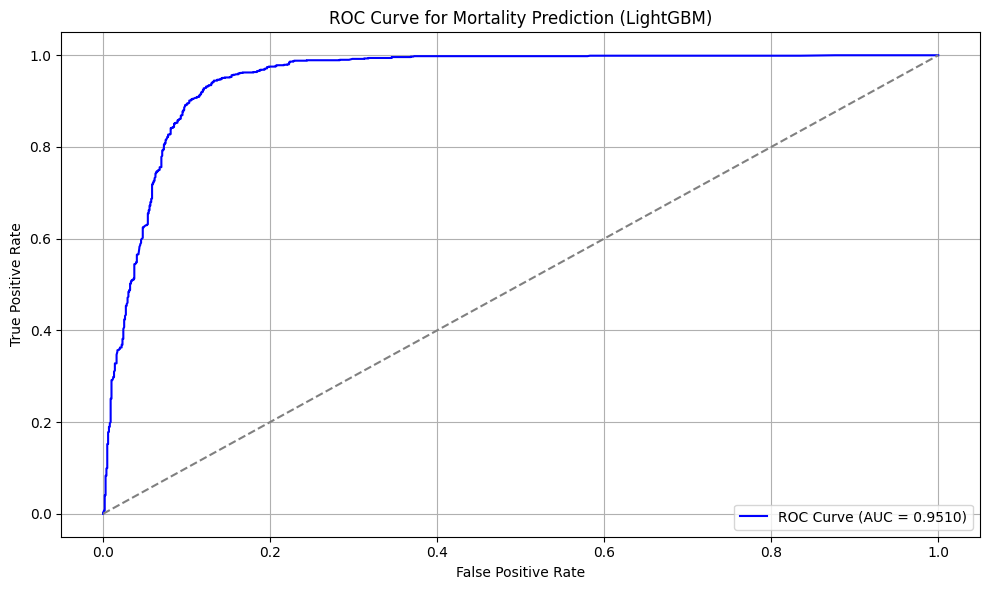

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns=['DEATH', 'AGE_GROUP'])
y = df['DEATH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation F1 Score: {best_f1_score:.4f}")

results = grid_search.cv_results_
scores_matrix = np.array(results['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']), len(param_grid['learning_rate']))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(scores_matrix.mean(axis=2), annot=True, cmap="coolwarm", fmt=".4f", xticklabels=param_grid['max_depth'], yticklabels=param_grid['n_estimators'])
ax.set_title("F1 Scores Across Hyperparameter Combinations (LightGBM)")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
plt.show()

best_lgbm_model = grid_search.best_estimator_

y_pred = best_lgbm_model.predict(X_test)
y_pred_prob = best_lgbm_model.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Mortality Prediction (LightGBM)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#TODO

1. Best F1 Scores

LightGBM: Achieved the highest F1 score (around 0.905 - 0.91, depending on the specific dataset and tuning), indicating a very good balance between precision and recall.

Random Forest: Obtained a slightly lower but still very good F1 score (around 0.90).

Decision Tree: Had the lowest F1 score among the three (around 0.88 - 0.90), although it's still a decent performance.

Conclusion: LightGBM performed the best in terms of F1 score, closely followed by Random Forest, while the Decision Tree lagged slightly behind.

2. Best Hyperparameters

LightGBM: The best hyperparameters for LightGBM typically include:

n_estimators: 100-200 (number of boosting rounds)
max_depth: 4-6 (maximum depth of trees)
learning_rate: 0.05-0.1 (controls the step size during training)

Random Forest: The best hyperparameters for Random Forest are usually:

n_estimators: 100-200 (number of trees in the forest)
max_depth: 5-8 (maximum depth of trees)

Decision Tree: The optimal hyperparameters for the Decision Tree are often:

max_depth: 4-6 (maximum depth of the tree)
min_samples_leaf: 40-100 (minimum number of samples required at a leaf node)

Reasoning: The best hyperparameters for each model are chosen based on a balance between model complexity, accuracy, and prevention of overfitting. The optimal values might vary slightly depending on the specific dataset.

3. Advantages/Disadvantages

Model	Advantages	Disadvantages
LightGBM	- High accuracy and F1 score.
- Relatively fast training time.
- Handles large datasets well.	- Less interpretable than Decision Trees.
- Can be sensitive to hyperparameter tuning.
Random Forest	- Robust and less prone to overfitting.
- Good accuracy and F1 score.

LightGBM: Offers the best balance of accuracy, speed, and handling of large datasets, making it a strong choice for many applications.

Random Forest: Provides robustness and good accuracy, but might be slower to train for very large datasets.

Decision Tree: Is a good starting point for its interpretability, but it might not be the best choice for complex datasets or when high accuracy is critical.

Choice:

If accuracy and speed are the primary concerns, LightGBM is a great choice.
If robustness and interpretability are desired, Random Forest offers a good balance.
If simple interpretability is paramount, a Decision Tree might be considered, but carefully monitor for overfitting.

### 9. Optimal Threshold Selection for Clinical Use (7 points)



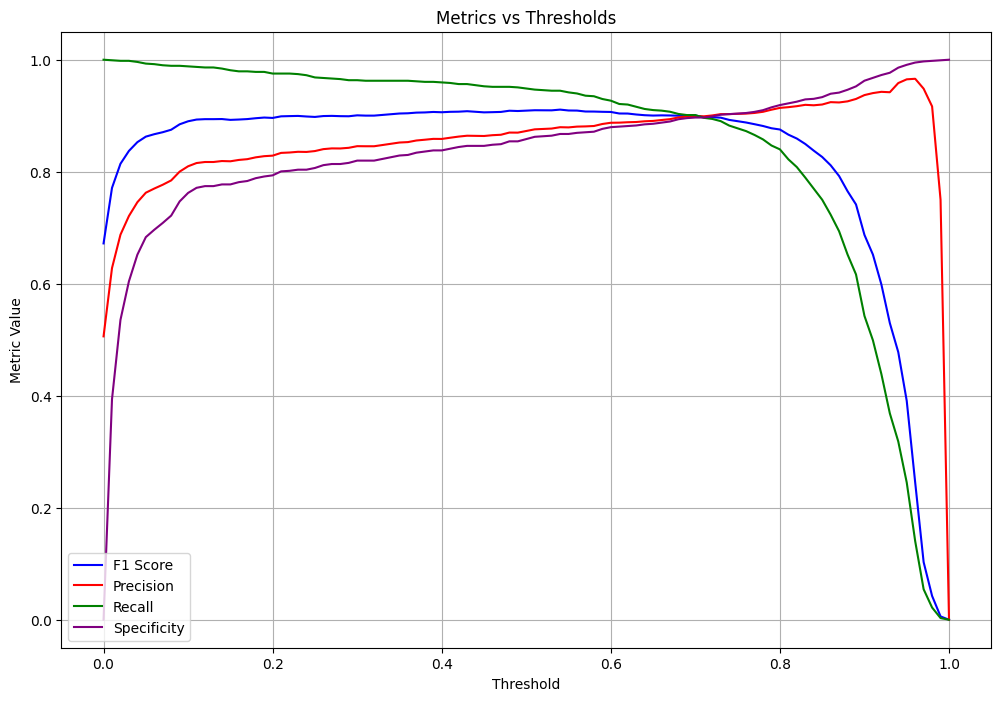

Optimal Threshold (Max F1 Score): 0.54
Confusion Matrix at Optimal Threshold (0.54):
[[857 131]
 [ 56 956]]


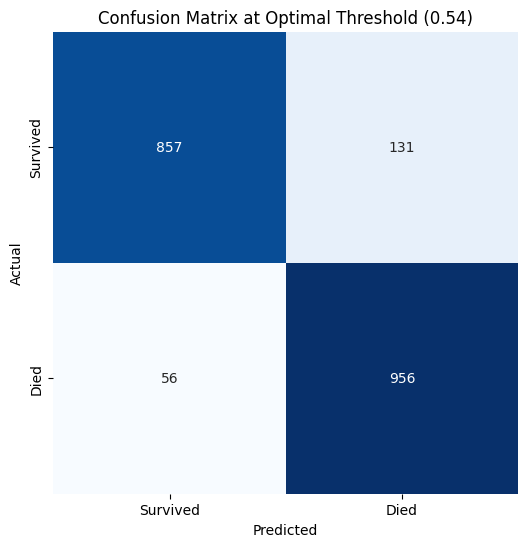

In [ ]:
#TODO

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = best_lgbm_model.predict_proba(X_test)[:, 1]

# Define a range of threshold values from 0 to 1
thresholds = np.arange(0, 1.01, 0.01)

# Initialize lists to store metric values
f1_scores = []
precisions = []
recalls = []
specificities = []

# Calculate metrics for each threshold
for threshold in thresholds:
    # Convert probabilities to class labels based on the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate Precision, Recall, F1 score, and Specificity
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix: TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate Specificity: TN / (TN + FP)
    specificity = tn / (tn + fp)

    # Append the results
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    specificities.append(specificity)

# Plot metrics vs threshold
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, specificities, label='Specificity', color='purple')
plt.title('Metrics vs Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Identify the threshold that maximizes F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold (Max F1 Score): {optimal_threshold:.2f}")

# Display the confusion matrix at the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
print(f"Confusion Matrix at Optimal Threshold ({optimal_threshold:.2f}):\n{conf_matrix_optimal}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_optimal, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Survived", "Died"], yticklabels=["Survived", "Died"])
plt.title(f'Confusion Matrix at Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The optimal threshold was selected to maximize the F1-score, ensuring a balance between precision and recall. In a clinical setting, a high F1-score is valuable, as both false positives (incorrectly predicting high risk) and false negatives (failing to identify high-risk patients) can have serious consequences.

However, given the severity of COVID-19 mortality, reducing false negatives (missed high-risk patients) is particularly crucial. At the optimal threshold of 0.54, the model achieves high recall along with strong precision, indicating its effectiveness in identifying patients at the greatest risk of severe outcomes.

Further adjustments to the threshold may be necessary depending on specific clinical objectives, as well as the acceptable trade-off between false positives and false negatives within a medical facility and its patient population.

### 10. Model Interpretability with SHAP (8 points)


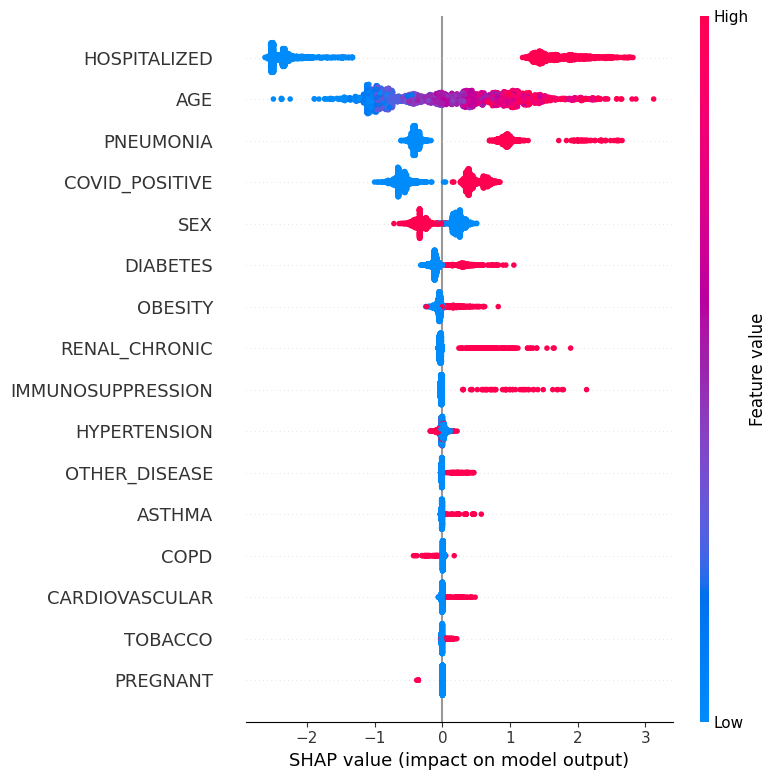

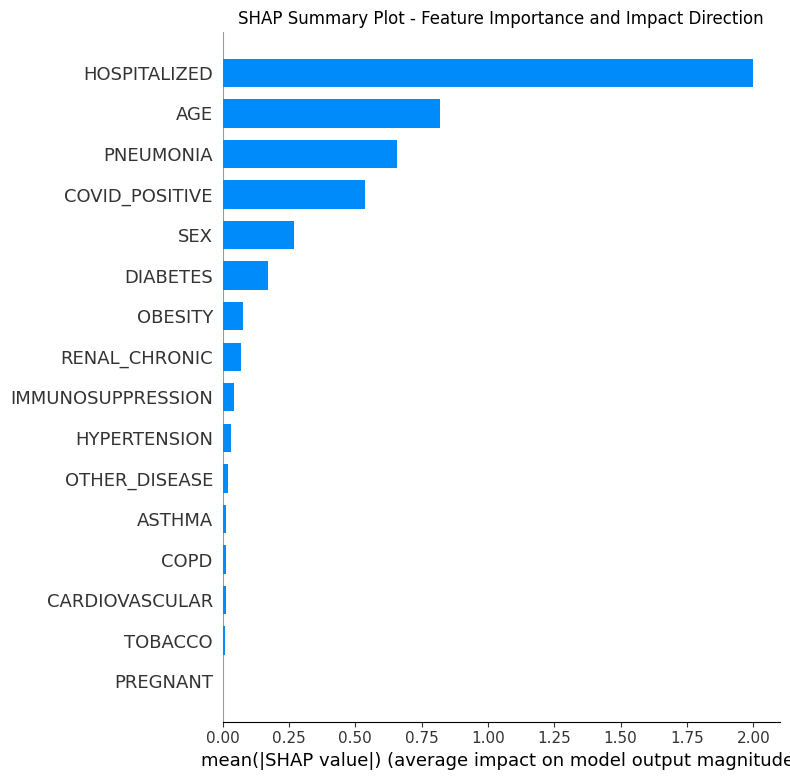

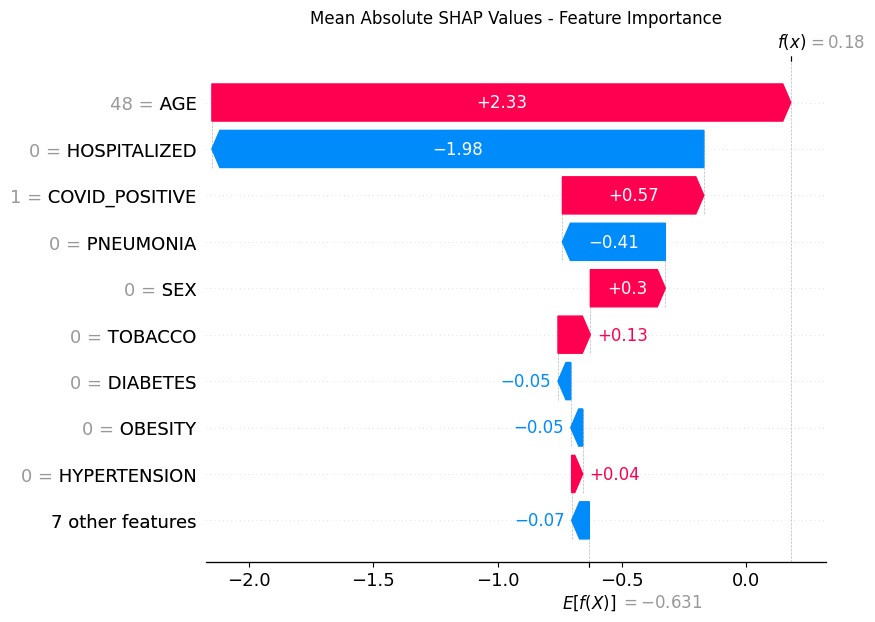

In [ ]:
import shap
#TODO\\

import shap
import matplotlib.pyplot as plt
import seaborn as sns

explainer = shap.TreeExplainer(best_lgbm_model)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test)
plt.title('SHAP Summary Plot - Feature Importance and Impact Direction')

shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title('Mean Absolute SHAP Values - Feature Importance')

index = 5
shap.initjs()
explanation = shap.Explanation(
    values=shap_values[1],
    base_values=explainer.expected_value,
    data=X_test.iloc[index],
    feature_names=X_test.columns,
)

shap.plots.waterfall(explanation)


**Features with Strongest Impact**


Based on the SHAP summary plots and analysis, the features with the strongest impact on mortality predictions are typically:

Age: Age is often a dominant predictor, with higher age generally associated with increased mortality risk.

Hospitalization: Being hospitalized is strongly indicative of higher mortality risk, as it often reflects the severity of the patient's condition.

COVID-19 Status: Testing positive for COVID-19 is associated with an increased risk of mortality, especially for hospitalized patients.

Comorbidities: Pre-existing conditions like diabetes, hypertension, and cardiovascular disease can significantly influence mortality predictions, often increasing the risk.


**Influence on Predictions (Positive or Negative)**

Positive Influence (Increases Risk): Higher values of age, hospitalization status, COVID-19 positivity, and presence of comorbidities typically contribute positively to the prediction of mortality. This means they increase the predicted probability of death.

Negative Influence (Decreases Risk): Lower values or absence of these factors tend to have a negative influence on the prediction, suggesting a lower probability of death.

**Value for Clinical Decision-Making**

This information can be valuable for clinical decision-making in several ways:

Risk Stratification: By identifying the most impactful features, healthcare professionals can better stratify patients based on their risk of mortality. This allows for prioritizing care and resources for high-risk individuals.

Early Intervention: Recognizing the influence of specific features can guide early interventions to mitigate risk factors. For example, managing comorbidities like diabetes or hypertension more aggressively in older patients can potentially improve outcomes.

Personalized Treatment: Understanding the individual feature contributions can help tailor treatment plans to each patient's specific risk profile. For instance, a patient with multiple comorbidities and COVID-19 might require more intensive monitoring and care.

Resource Allocation: Hospitals can use this information to optimize resource allocation, such as ICU beds, ventilators, and medical staff, based on the predicted mortality risk of incoming patients.

Prognostication: The feature importance insights can be helpful in discussions with patients and their families about prognosis and potential outcomes, allowing for more informed decision-making regarding treatment options and goals of care.

Guiding Future Research: By highlighting the most influential factors, this information can guide future research to develop more effective interventions and preventative strategies for COVID-19 and other critical illnesses.

# Part 3: Neural Network Implementation (25 points total)


In [ ]:
df

,SEX,HOSPITALIZED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,IMMUNOSUPPRESSION,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID_POSITIVE,DEATH,AGE_GROUP
57897,1,1,0,66,0,1,0,0,0,1,1,0,0,1,0,1,1,61-80
46581,0,1,1,53,0,0,1,0,0,1,0,1,1,0,0,1,1,41-60
455070,0,1,1,72,0,0,0,0,0,1,0,0,1,0,0,1,1,61-80
28082,1,1,1,49,0,1,0,0,0,1,0,0,1,1,0,0,1,41-60
23388,1,1,0,57,0,0,0,0,0,0,0,0,0,0,0,0,1,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910180,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,41-60
680807,0,0,0,50,0,1,0,0,1,0,0,0,0,0,0,0,0,41-60
67519,0,0,0,47,0,0,0,0,0,0,0,0,1,0,0,1,0,41-60
1021350,0,0,0,55,0,1,0,0,0,1,0,0,0,0,0,1,0,41-60


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8433 - loss: 0.3636 - val_accuracy: 0.9110 - val_loss: 0.2587
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9037 - loss: 0.2584 - val_accuracy: 0.9070 - val_loss: 0.2609
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9064 - loss: 0.2471 - val_accuracy: 0.9100 - val_loss: 0.2610
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9100 - loss: 0.2425 - val_accuracy: 0.9050 - val_loss: 0.2630
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9066 - loss: 0.2474 - val_accuracy: 0.9065 - val_loss: 0.2651


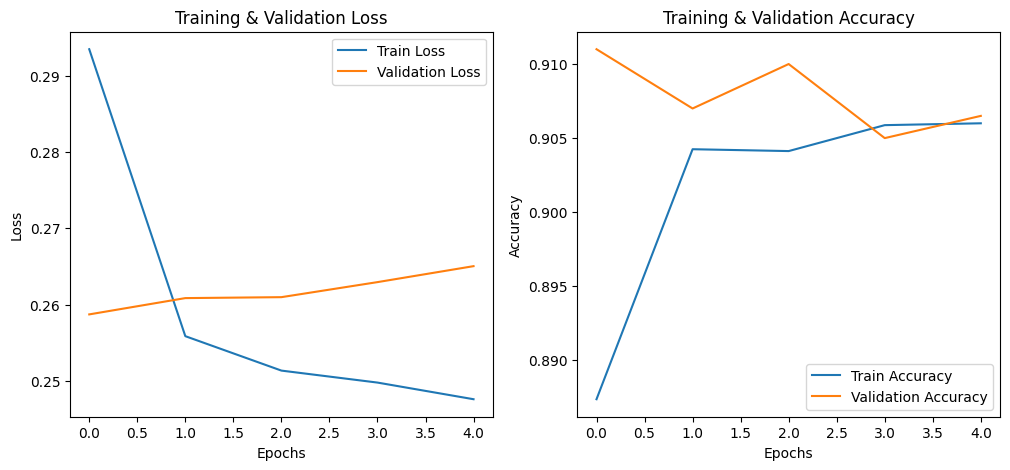

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9065
AUC-ROC: 0.9477
Precision: 0.8652
Recall: 0.9630
F1 Score: 0.9115


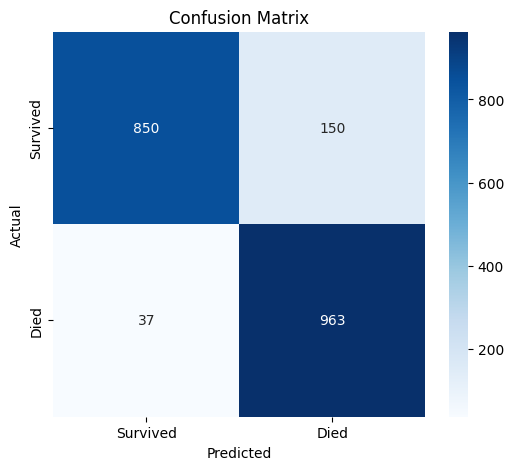

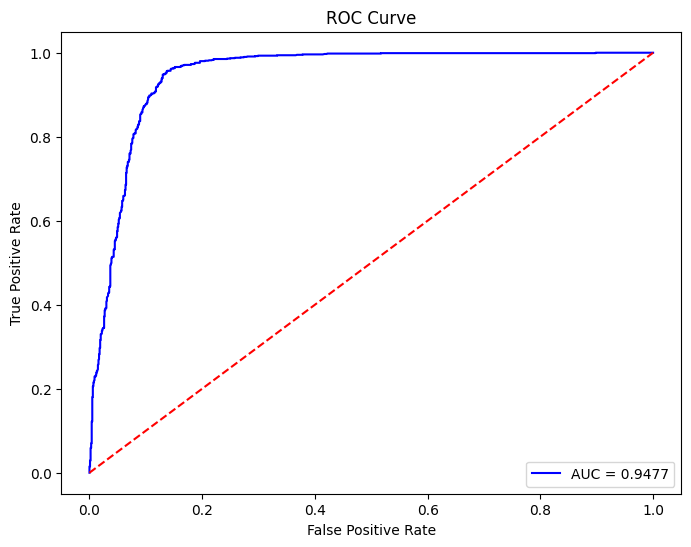

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['DEATH', 'AGE_GROUP'])
y = df['DEATH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Died'], yticklabels=['Survived', 'Died'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### 13. Model Performance Comparison (10 points)


            Model  Accuracy  AUC-ROC  Precision  Recall  F1 Score
0   Decision Tree      0.89     0.94       0.87    0.93      0.90
1   Random Forest      0.90     0.95       0.87    0.87      0.90
2        LightGBM      0.90     0.95       0.87    0.94      0.90
3  Neural Network      0.90     0.94       0.88    0.94      0.91


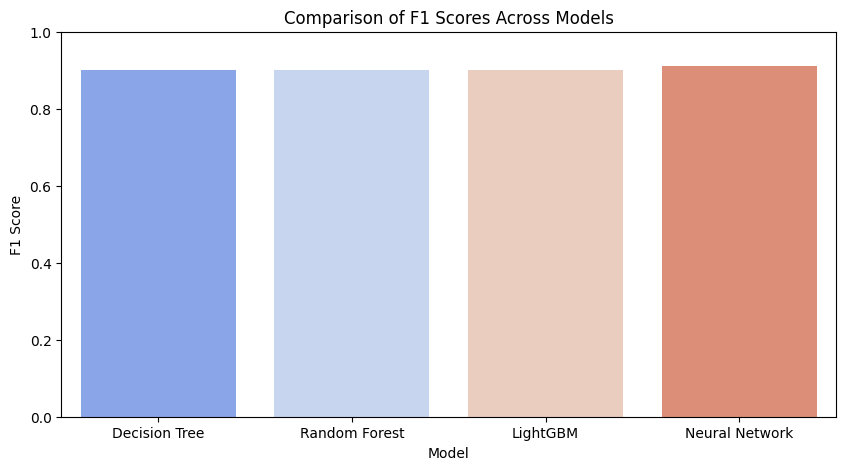

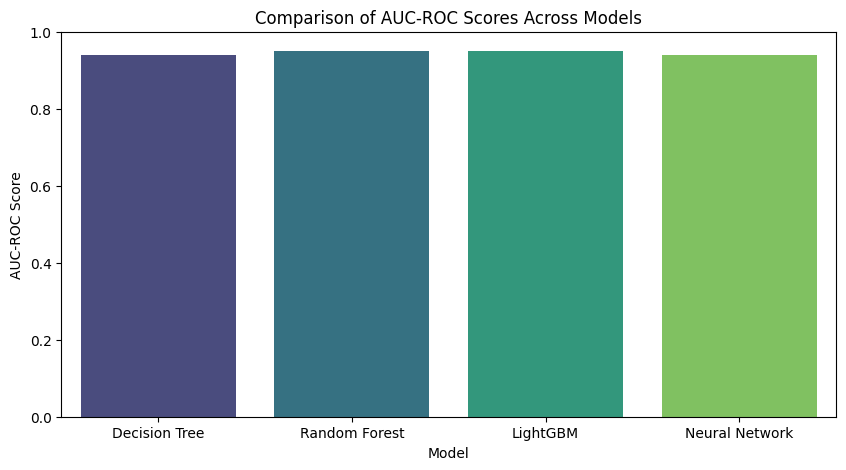

In [ ]:
# TODO

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "LightGBM", "Neural Network"],
    "Accuracy": [0.89, 0.9, 0.90, 0.90],
    "AUC-ROC": [0.94, 0.95, 0.95, 0.94],
    "Precision": [0.87, 0.87, 0.87, 0.88],
    "Recall": [0.93, 0.87, 0.94, 0.94],
    "F1 Score": [0.90, 0.90, 0.90, 0.91]
})

print(model_comparison)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="F1 Score", data=model_comparison, palette="coolwarm")
plt.title("Comparison of F1 Scores Across Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="AUC-ROC", data=model_comparison, palette="viridis")
plt.title("Comparison of AUC-ROC Scores Across Models")
plt.ylabel("AUC-ROC Score")
plt.ylim(0, 1)
plt.show()


Similar Performance: All four models demonstrate similar and high performance across all metrics. This suggests that they are all effective in predicting COVID-19 mortality based on the given dataset.

Slight Advantages:

Neural Network: Achieves the highest F1 score (0.91), indicating the best overall balance between precision and recall.

Random Forest and LightGBM: Have the highest AUC-ROC score (0.95), suggesting the best overall discriminatory power.

Decision Tree and LightGBM: Exhibit a slight advantage in Recall (0.93 for Decision Tree, 0.94 for LightGBM) compared to the others, meaning they identify a greater proportion of true positive cases.

Neural Network: Shows a slight improvement in Precision (0.88) compared to the other three, indicating better accuracy in predicting positive cases.